## About Dataset

This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.

The columns in the given dataset are as follows:

name

year

selling_price

km_driven

fuel

seller_type

transmission

Owner

https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho



## Import libraries 

In [87]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Exploratry Data Analysis

In [88]:
# Loading the car dataset
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [89]:
# checking the no of rows and columns
df.shape

(301, 9)

In [90]:
df.size

2709

In [91]:
# Getting info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [93]:
# Checking the missing values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [94]:
# Checking the unique categories in each Categorical column
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [95]:
# Checking the distribution in each Categorical column
print(df.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [96]:
print(df["Seller_Type"].value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [97]:
print(df["Transmission"].value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [98]:
# Checking no of duplicate in each column
df[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [99]:
# Remove duplicates
df = df.drop_duplicates()

In [100]:
df[df.duplicated()].sum()

Car_Name           0
Year               0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven         0
Fuel_Type          0
Seller_Type        0
Transmission       0
Owner              0
dtype: object

In [101]:
df.shape

(299, 9)

In [102]:
df.size

2691

## Encoding the categorical column

In [103]:
# Encoding "Fuel_Type" column
df.replace({'Fuel_Type' : {'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)

# Encoding "Seller_Type" column
df.replace({'Seller_Type' : {'Dealer':0,'Individual':1}},inplace = True)

# Encoding "Transmission" column
df.replace({'Transmission' : {'Manual':0,'Automatic':1}},inplace = True)

In [104]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Train Test Split

In [105]:
# Split df into independent and Target variables
X = df.drop(columns=['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [106]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [107]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64


In [113]:
# import train_test_split from model_selection module
from sklearn.model_selection import train_test_split

In [211]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

## Building a ML Model
### 1. Linear Regression Model

In [212]:
# Import Linear Regression Model library
from sklearn.linear_model import LinearRegression

In [213]:
# Initilized Linear regression Model
lin_reg = LinearRegression()

In [214]:
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [215]:
# Evaluate the model
from sklearn import metrics

# Prediction on training dataset
train_predict = lin_reg.predict(X_train)

In [216]:
# R square Error 
R2_score_train = metrics.r2_score(Y_train, train_predict) 
print("R squared Error:",R2_score_train)

R squared Error: 0.8771123681040541


## Visualize the Actual and Predicted Prices(Train Set)

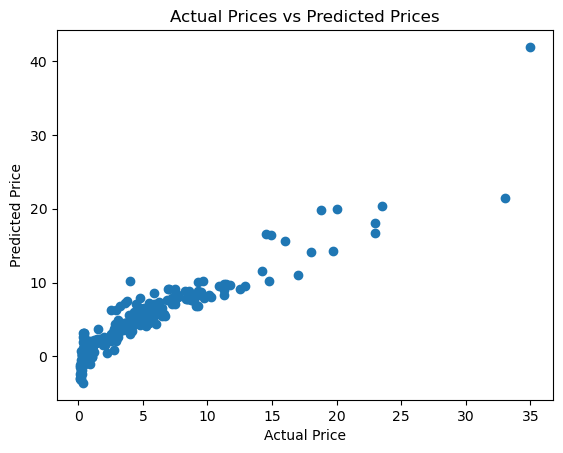

In [217]:
plt.scatter(Y_train, train_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [218]:
# Prediction on training dataset
test_predict = lin_reg.predict(X_test)

In [219]:
# R square Error 
R2_score_test = metrics.r2_score(Y_test, test_predict) 
print("R squared Error:",R2_score_test)

R squared Error: 0.8562516649198026


## Visualize the Actual and Predicted Prices(Test Set)

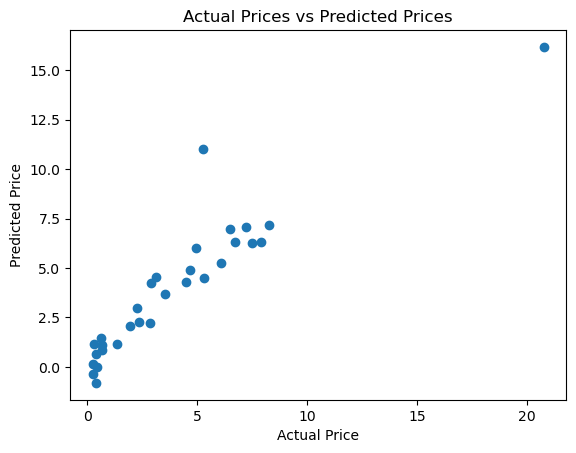

In [220]:
plt.scatter(Y_test, test_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

## 2. Lasso Regression Model

In [221]:
# Import Lasso Regression Model library
from sklearn.linear_model import Lasso

In [222]:
# Initilized Lasso regression Model
lasso_reg = Lasso()

In [223]:
lasso_reg.fit(X_train,Y_train)

Lasso()

In [224]:
# Prediction on training dataset
train_predict = lasso_reg.predict(X_train)

In [225]:
# R square Error 
R2_score_train = metrics.r2_score(Y_train, train_predict) 
print("R squared Error:",R2_score_train)

R squared Error: 0.8428090658179708


## Visualize the Actual and Predicted Prices(Train Set)

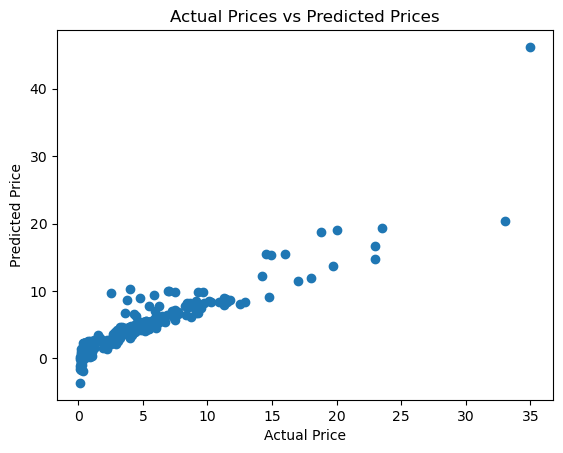

In [226]:
plt.scatter(Y_train, train_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [227]:
# Prediction on training dataset
test_predict = lasso_reg.predict(X_test)

In [228]:
# R square Error 
R2_score_test = metrics.r2_score(Y_test, test_predict) 
print("R squared Error:",R2_score_test)

R squared Error: 0.7933398240755692


## Visualize the Actual and Predicted Prices(Test Set)

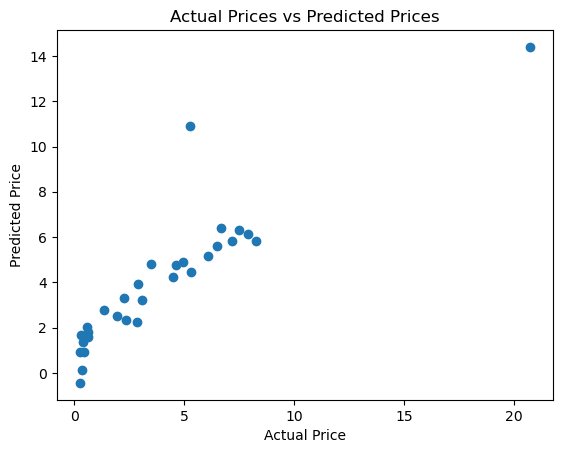

In [229]:
plt.scatter(Y_test, test_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()